This problem was adapted from Professor Farimani's paper. If you are interested in learning more, you can read it <a href="https://www.nature.com/articles/s41699-018-0060-8.pdf">here</a>.

In [34]:
# (a)
# data preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
import csv


X1 = pd.read_csv('data.csv').iloc[:,:-1:2].values
X1 = X1.reshape(-1,1)
X2 = pd.read_csv('data.csv').iloc[:,1::2].values
X2 = X2.reshape(-1,1)
X = np.concatenate((X1,X2),axis=1)

Y = pd.read_csv("data.csv", skiprows=0, nrows=0)
Y.columns.to_list()
Y = list(Y.columns[1::2])
y = [l for l in Y]
a = list(set(y))
dic = dict(zip(a, list(range(0,len(a)))))
y = [dic[v] for v in y]

y = np.array(y).reshape(-1,1)
Y = np.tile(y,(100,1))

X1 = X1.reshape(-1,)
X2 = X2.reshape(-1,)
Y = Y.reshape(-1,)

# file = open("Final_Data.csv", "w")
# writer = csv.writer(file)
# for w in range(X1.shape[0]):
#     writer.writerow([X1[w], X2[w], Y[w]])
# file.close()

X1 = X1.reshape(-1,1)
X2 = X2.reshape(-1,1)
Y = Y.reshape(-1,1)



In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X1_train = X_train[:,0].reshape(-1,)
X2_train = X_train[:,1].reshape(-1,)
X1_test = X_test[:,0].reshape(-1,)
X2_test = X_test[:,1].reshape(-1,)
y1_train = y_train.reshape(-1,)
y1_test = y_test.reshape(-1,)
# X2 = X2.reshape(-1,)
# Y = Y.reshape(-1,)
file = open("Final_Train_Data.csv", "w")
writer = csv.writer(file)
for w in range(X1_train.shape[0]):
    writer.writerow([X1_train[w], X2_train[w], y1_train[w]])
file.close()
file = open("Final_Test_Data.csv", "w")
writer = csv.writer(file)
for w in range(X1_test.shape[0]):
    writer.writerow([X1_test[w], X2_test[w], y1_test[w]])
file.close()


Training accuracy =  0.0
Testing accuracy =  0.0


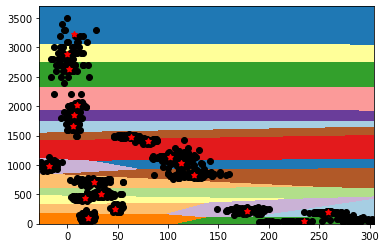

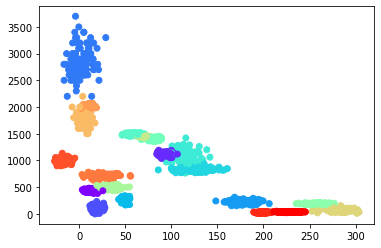

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
kmeans = KMeans(n_clusters=20)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_train)
# train_acc = np.sum(y_train == y_pred)/y_train.shape[0]
# print(train_acc)
train_acc = accuracy_score(y_pred, y_train)
print("Training accuracy = ", train_acc*100)

y_test_pred = kmeans.predict(X_test)
test_acc = accuracy_score(y_test_pred, y_test)
print("Testing accuracy = ",test_acc*100)
# test_acc = np.count_nonzero(y_test == y_test_pred)/y_test.shape[0]
# print(test_acc)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
       cmap=plt.cm.Paired,
       aspect='auto', origin='lower')

plt.scatter(X_train[:,0],X_train[:,1],c='k')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c ='r',marker=(5, 1))

plt.show()


plt.scatter(X[:,0],X[:,1],c = Y, cmap = 'rainbow')
plt.show()

Train accuracy = 100.0 %
Test accuracy = 97.83333333333334 %


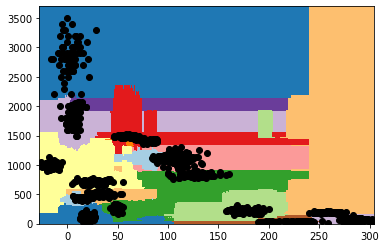

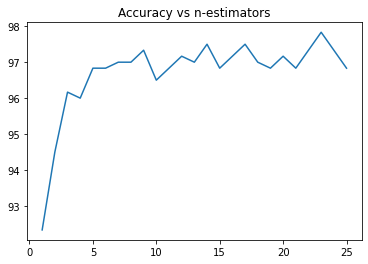

In [37]:
# (c)

# random forest

clf = RandomForestClassifier()
clf.fit(X_train,y_train.reshape(-1,))

y_pred = clf.predict(X_train)

print(f"Train accuracy = {accuracy_score(y_train, clf.predict(X_train))*100} %")
print(f"Test accuracy = {accuracy_score(y_test, clf.predict(X_test))*100} %")

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))

# Obtain labels for each point in mesh. Use last trained model.
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
       cmap=plt.cm.Paired,
       aspect='auto', origin='lower')

plt.scatter(X_train[:,0],X_train[:,1],c='k')
plt.show()

acc = np.zeros(25,)
for i in range(25):
       clf = RandomForestClassifier(n_estimators = i+1) 
       clf.fit(X_train,y_train.reshape(-1,))
       acc[i] = accuracy_score(y_test, clf.predict(X_test))*100
a = [i+1 for i in range(25)]
plt.plot(a, acc)
plt.title("Accuracy vs n-estimators")
plt.show()

# (d)
# Analysis
K-means algorithm predicted the centroids with a large error. The centroids classified the groups differently than the original dataset. The accuracy of kmeans is very low for both training and test sets. On the other hand, random forest has 100% training accuracy and 97% testing accuracy. The accuracy increases with the increase in number of estimators initially, but it then starts to oscillate with slight variations as we increase the number of estimators. The decision boundaries of kmeans is less complex tha that of random forest. However, the decision boundaries of the random forest algorithm also align well with the dataset provided. This shows that random forest classifies the data better for this particular example.

